In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
club_rankings = pd.read_csv('spi_global_rankings.csv')
matches = pd.read_csv('spi_matches.csv')

In [3]:
club_rankings.head()

,rank,prev_rank,name,league,off,def,spi
0,1,1,Manchester City,Barclays Premier League,3.25,0.25,94.79
1,2,2,Bayern Munich,German Bundesliga,3.43,0.43,93.61
2,3,3,Liverpool,Barclays Premier League,2.85,0.31,91.85
3,4,5,Barcelona,Spanish Primera Division,2.83,0.44,89.63
4,5,4,Paris Saint-Germain,French Ligue 1,2.90,0.50,89.22


In [4]:
matches_with_xg = matches.dropna(0, subset=['xg1'])

In [5]:
matches_with_xg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15187 entries, 0 to 27723
Data columns (total 22 columns):
date           15187 non-null object
league_id      15187 non-null int64
league         15187 non-null object
team1          15187 non-null object
team2          15187 non-null object
spi1           15187 non-null float64
spi2           15187 non-null float64
prob1          15187 non-null float64
prob2          15187 non-null float64
probtie        15187 non-null float64
proj_score1    15187 non-null float64
proj_score2    15187 non-null float64
importance1    13365 non-null float64
importance2    13365 non-null float64
score1         15187 non-null float64
score2         15187 non-null float64
xg1            15187 non-null float64
xg2            15187 non-null float64
nsxg1          15187 non-null float64
nsxg2          15187 non-null float64
adj_score1     15187 non-null float64
adj_score2     15187 non-null float64
dtypes: float64(17), int64(1), object(4)
memory usage: 2.7+ M

In [6]:
result = matches_with_xg[['date', 'team1', 'spi1', 'score1', 'score2', 'team2', 'spi2']]

In [7]:
result.head()

,date,team1,spi1,score1,score2,team2,spi2
0,2016-08-12,Bastia,51.16,0.0,1.0,Paris Saint-Germain,85.68
1,2016-08-12,AS Monaco,68.85,2.0,2.0,Guingamp,56.48
2,2016-08-13,Hull City,53.57,2.0,1.0,Leicester City,66.81
3,2016-08-13,Crystal Palace,55.19,0.0,1.0,West Bromwich Albion,58.66
4,2016-08-13,Everton,68.02,1.0,1.0,Tottenham Hotspur,73.25


In [8]:
name_and_rank = club_rankings[['rank', 'name']]
name_and_rank

,rank,name
0,1,Manchester City
1,2,Bayern Munich
2,3,Liverpool
3,4,Barcelona
4,5,Paris Saint-Germain
...,...,...
624,625,Grimsby Town
625,626,Macclesfield
626,627,Walsall
627,628,Colorado Springs Switchbacks FC


In [9]:
count = club_rankings.groupby(by='league', axis=0).size()
#count.dropna(inplace = True)
average_rank_league = club_rankings.groupby(by='league').mean()
average_rank_league['num'] = count
average_rank_league.sort_values(by='rank', ascending=True, inplace=True)
average_rank_league.reset_index(inplace=True)
average_rank_by_league = average_rank_league[['league', 'rank']]
average_rank_by_league

,league,rank
0,Barclays Premier League,44.450000
1,Spanish Primera Division,47.600000
2,German Bundesliga,62.444444
3,UEFA Champions League,89.250000
4,Italy Serie A,91.350000
5,French Ligue 1,108.700000
6,Russian Premier Liga,189.937500
7,Brasileiro Série A,190.750000
8,UEFA Europa League,191.181818
9,English League Championship,213.958333


In [10]:
print(matches.columns)
print(club_rankings.columns)

Index(['date', 'league_id', 'league', 'team1', 'team2', 'spi1', 'spi2',
       'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')
Index(['rank', 'prev_rank', 'name', 'league', 'off', 'def', 'spi'], dtype='object')


In [11]:
print(matches.shape)
print(club_rankings.shape)

(32290, 22)
(629, 7)


In [12]:
home_teams = matches[['date', 'team1', 'spi1', 'proj_score1', 'score1']].copy()
away_teams = matches[['date', 'team2', 'spi2', 'proj_score2', 'score2']].copy()

In [13]:
home_teams.head()

,date,team1,spi1,proj_score1,score1
0,2016-08-12,Bastia,51.16,0.91,0.0
1,2016-08-12,AS Monaco,68.85,1.82,2.0
2,2016-08-13,Hull City,53.57,1.16,2.0
3,2016-08-13,Crystal Palace,55.19,1.35,0.0
4,2016-08-13,Everton,68.02,1.47,1.0


In [14]:
score_vs_proj = home_teams['score1'] - home_teams['proj_score1']
type(score_vs_proj)

pandas.core.series.Series

In [15]:
home_teams['score_vs_proj'] = score_vs_proj

In [16]:
home_teams.loc[(home_teams['team1'] == 'AS Monaco')]

,date,team1,spi1,proj_score1,score1,score_vs_proj
1,2016-08-12,AS Monaco,68.85,1.82,2.0,0.18
103,2016-08-28,AS Monaco,68.97,1.24,3.0,1.76
189,2016-09-17,AS Monaco,73.06,1.89,3.0,1.11
283,2016-09-24,AS Monaco,71.76,1.82,2.0,0.18
315,2016-09-27,AS Monaco,70.75,1.36,1.0,-0.36
...,...,...,...,...,...,...
30679,2020-03-14,AS Monaco,64.98,1.68,NaN,NaN
31163,2020-04-05,AS Monaco,64.98,1.54,NaN,NaN
31502,2020-04-18,AS Monaco,64.98,1.66,NaN,NaN
31865,2020-05-02,AS Monaco,64.98,1.83,NaN,NaN


In [17]:
home_teams.rename(columns={'team1': 'team', 'score1': 'score', 'proj_score1': 'projected', 'spi1': 'spi'}, inplace=True)

In [18]:
score_vs_proj2 = away_teams['score2'] - away_teams['proj_score2']
type(score_vs_proj2)
away_teams['score_vs_proj'] = score_vs_proj2

In [19]:
away_teams.rename(columns = {'team2': 'team', 'score2': 'score', 'proj_score2': 'projected', 'spi2': 'spi'}, inplace=True)

In [20]:
home_teams.dropna(inplace=True)
away_teams.dropna(inplace=True)

In [21]:
all_teams = home_teams.append(away_teams)

In [101]:
team_averages = all_teams.groupby(by='team').mean()
games_played = all_teams.groupby(by='team').size()
team_averages['games'] = games_played

In [23]:
team_averages.sort_values(by='score_vs_proj', ascending=False)

,spi,projected,score,score_vs_proj,games
team,,,,,
Legia Warsaw,47.603333,0.483333,1.500000,1.016667,6
Famalicao,44.110000,1.144167,2.000000,0.855833,12
Rijeka,50.568333,1.021667,1.833333,0.811667,6
Slovan Bratislava,44.930000,0.838000,1.600000,0.762000,5
Loudoun United FC,10.018529,1.116176,1.735294,0.619118,34
...,...,...,...,...,...
Hapoel Be'er,50.296667,1.258333,0.833333,-0.425000,6
Mamelodi Sundowns,41.600000,1.762683,1.317073,-0.445610,41
Red Star Belgrade,61.157368,1.043158,0.578947,-0.464211,19


In [24]:
team_averages.describe()

,spi,projected,score,score_vs_proj,games
count,752.000000,752.000000,752.000000,752.000000,752.000000
mean,40.652742,1.279447,1.289853,0.010407,73.696809
std,16.565512,0.283345,0.349331,0.161664,37.614926
min,6.770769,0.483333,0.166667,-0.818333,5.000000
25%,29.234201,1.103255,1.062500,-0.077332,43.000000
50%,39.586301,1.229436,1.252636,0.000688,70.000000
75%,50.244486,1.411340,1.477826,0.093891,102.000000
max,93.419636,2.711900,2.940000,1.016667,170.000000


In [25]:
teams_50_games_plus = team_averages.loc[(team_averages.games >= 50)]
teams_50_games_plus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 1. FC Heidenheim 1846 to Östersunds FK
Data columns (total 5 columns):
spi              511 non-null float64
projected        511 non-null float64
score            511 non-null float64
score_vs_proj    511 non-null float64
games            511 non-null int64
dtypes: float64(4), int64(1)
memory usage: 24.0+ KB


In [26]:
teams_50_games_plus.sort_values(by='games', ascending=False)

,spi,projected,score,score_vs_proj,games
team,,,,,
Arsenal,80.728471,1.966588,1.976471,0.009882,170
Atletico Madrid,85.994556,1.531834,1.514793,-0.017041,169
Real Madrid,90.763713,2.353653,2.323353,-0.030299,167
Juventus,86.660361,1.952651,1.915663,-0.036988,166
Barcelona,93.419636,2.508545,2.527273,0.018727,165
...,...,...,...,...,...
Kawasaki Frontale,54.130600,1.800200,1.740000,-0.060200,50
Lecce,35.774600,1.298800,1.680000,0.381200,50
Shonan Bellmare,29.690600,1.149400,1.120000,-0.029400,50


In [27]:
club_rankings.rename(columns={'name': 'team'}, inplace=True)

In [28]:
teams_50_games_plus = pd.merge(club_rankings, teams_50_games_plus, how='inner', on='team')

In [29]:
teams_50_games_plus.rename(columns={'spi_x': 'current_spi', 'spi_y': 'average_spi'}, inplace=True)

In [30]:
top_ranked_teams = teams_50_games_plus.loc[(teams_50_games_plus['rank'] <= 50)]

In [31]:
top_ranked_teams.head()

,rank,prev_rank,team,league,off,def,current_spi,average_spi,projected,score,score_vs_proj,games
0,1,1,Manchester City,Barclays Premier League,3.25,0.25,94.79,90.551118,2.392795,2.484472,0.091677,161
1,2,2,Bayern Munich,German Bundesliga,3.43,0.43,93.61,92.878467,2.487733,2.620000,0.132267,150
2,3,3,Liverpool,Barclays Premier League,2.85,0.31,91.85,86.892516,2.128616,2.257862,0.129245,159
3,4,5,Barcelona,Spanish Primera Division,2.83,0.44,89.63,93.419636,2.508545,2.527273,0.018727,165
4,5,4,Paris Saint-Germain,French Ligue 1,2.90,0.50,89.22,88.816178,2.429427,2.566879,0.137452,157


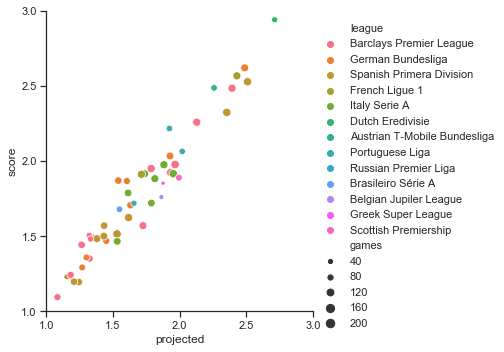

In [32]:
sns.set(style="ticks")
g = sns.relplot(x='projected', y='score', hue='league', size='games', data=top_ranked_teams)
g.set(xlim=(1, 3), ylim=(1, 3), xticks=(1,1.5,2,2.5,3), yticks=(1,1.5,2,2.5,3))

[[<matplotlib.axis.YTick at 0x1b81a613d68>,
 (1, 3),
 (1, 3)]

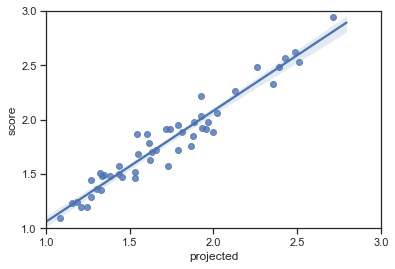

In [35]:
plot1 = sns.regplot(x='projected', y='score', data=top_ranked_teams)
plot1.set(xlim=(1, 3), ylim=(1, 3), xticks=(1,1.5,2,2.5,3), yticks=(1,1.5,2,2.5,3))

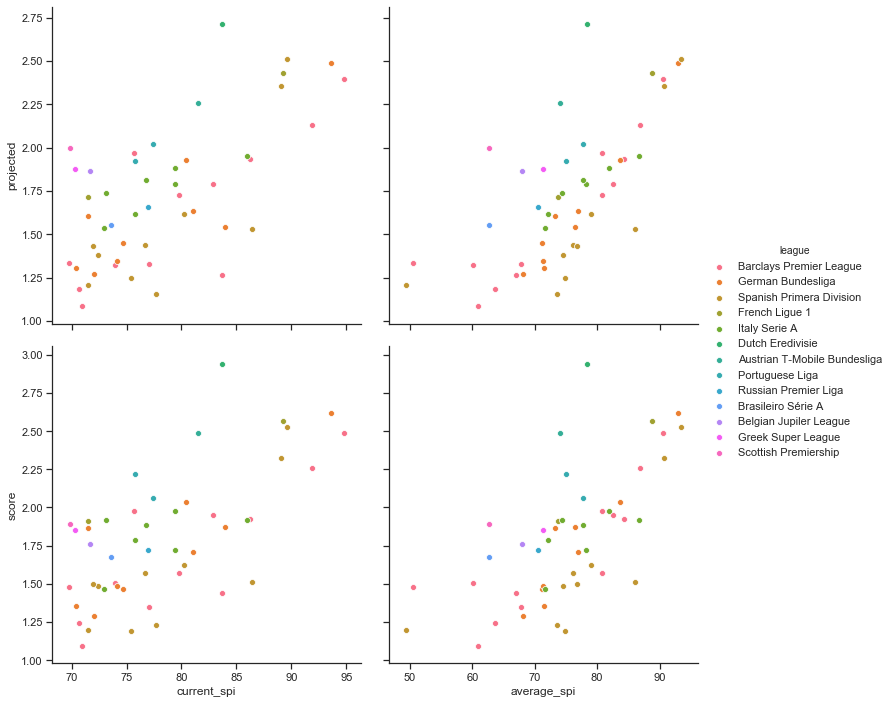

In [40]:
plot2 = sns.pairplot(top_ranked_teams, hue='league', x_vars=['current_spi', 'average_spi'], y_vars=['projected', 'score'], height=5)

In [41]:
teams_50_games_plus.head()

,rank,prev_rank,team,league,off,def,current_spi,average_spi,projected,score,score_vs_proj,games
0,1,1,Manchester City,Barclays Premier League,3.25,0.25,94.79,90.551118,2.392795,2.484472,0.091677,161
1,2,2,Bayern Munich,German Bundesliga,3.43,0.43,93.61,92.878467,2.487733,2.620000,0.132267,150
2,3,3,Liverpool,Barclays Premier League,2.85,0.31,91.85,86.892516,2.128616,2.257862,0.129245,159
3,4,5,Barcelona,Spanish Primera Division,2.83,0.44,89.63,93.419636,2.508545,2.527273,0.018727,165
4,5,4,Paris Saint-Germain,French Ligue 1,2.90,0.50,89.22,88.816178,2.429427,2.566879,0.137452,157


In [72]:
top_five_leagues = 'Barclays Premier League German Bundesliga Spanish Primera Division French Ligue 1 Italy Serie A'

In [103]:
team_averages.head()

,spi,projected,score,score_vs_proj,games
team,,,,,
1. FC Heidenheim 1846,33.368916,1.317831,1.542169,0.224337,83
1. FC Kaiserslautern,34.278824,1.155588,1.235294,0.079706,34
1. FC Magdeburg,30.305882,1.236176,1.029412,-0.206765,34
1. FC Nürnberg,47.050000,1.322530,1.301205,-0.021325,83
1. FC Union Berlin,44.512469,1.451111,1.530864,0.079753,81


In [104]:
team_averages = pd.merge(club_rankings, team_averages, how='inner', on='team')

In [105]:
team_averages.rename(columns={'spi_x': 'current_spi', 'spi_y': 'average_spi'}, inplace=True)

In [106]:
team_averages['league'].astype('str')

0       Barclays Premier League
1             German Bundesliga
2       Barclays Premier League
3      Spanish Primera Division
4                French Ligue 1
                 ...           
624          English League Two
625          English League Two
626          English League Two
627        United Soccer League
628          English League Two
Name: league, Length: 629, dtype: object

In [107]:
pl_teams = team_averages.loc[(team_averages['league'].str.contains(pat='Barclays'))]

In [109]:
pl_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 122
Data columns (total 12 columns):
rank             20 non-null int64
prev_rank        20 non-null int64
team             20 non-null object
league           20 non-null object
off              20 non-null float64
def              20 non-null float64
current_spi      20 non-null float64
average_spi      20 non-null float64
projected        20 non-null float64
score            20 non-null float64
score_vs_proj    20 non-null float64
games            20 non-null int64
dtypes: float64(7), int64(3), object(2)
memory usage: 2.0+ KB


In [110]:
bundesliga_teams = team_averages.loc[(team_averages['league'].str.contains(pat='German Bundesliga'))]
la_liga_teams = team_averages.loc[(team_averages['league'].str.contains(pat='Spanish Primera Division'))]
ligue_1_teams = team_averages.loc[(team_averages['league'].str.contains(pat='French Ligue 1'))]
serie_a_teams = team_averages.loc[(team_averages['league'].str.contains(pat='Italy Serie A'))]

In [111]:
top_league_teams = pl_teams.append([bundesliga_teams, la_liga_teams, ligue_1_teams, serie_a_teams])

In [116]:
top_league_teams.league.value_counts()

Italy Serie A               20
French Ligue 1              20
Spanish Primera Division    20
Barclays Premier League     20
German Bundesliga           18
Name: league, dtype: int64

[Text(0, 0, 'PL'),
 Text(1, 0, 'GBL'),
 Text(2, 0, 'SPD'),
 Text(3, 0, 'FL1'),
 Text(4, 0, 'ISA')]

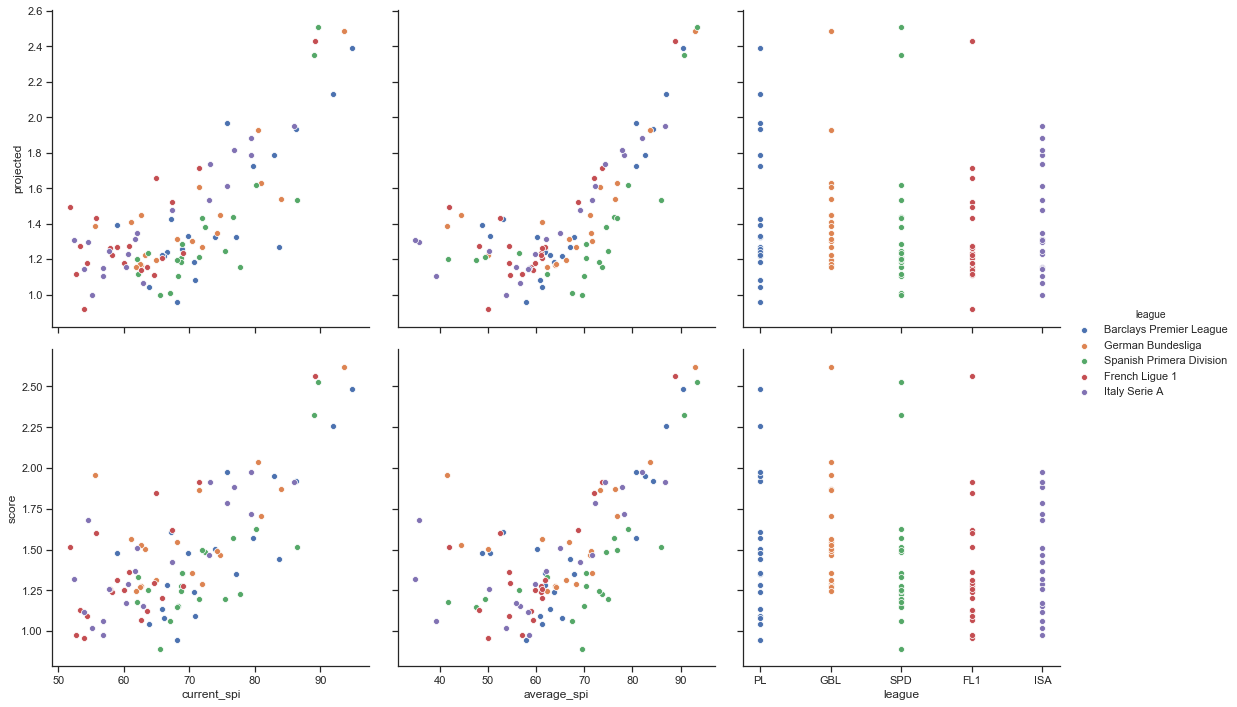

In [120]:
plot3 = sns.pairplot(top_league_teams, hue='league', x_vars=['current_spi', 'average_spi', 'league'], y_vars=['projected', 'score'], height=5)
plot3.axes[1,2].set_xticklabels(['PL','GBL','SPD','FL1','ISA'])

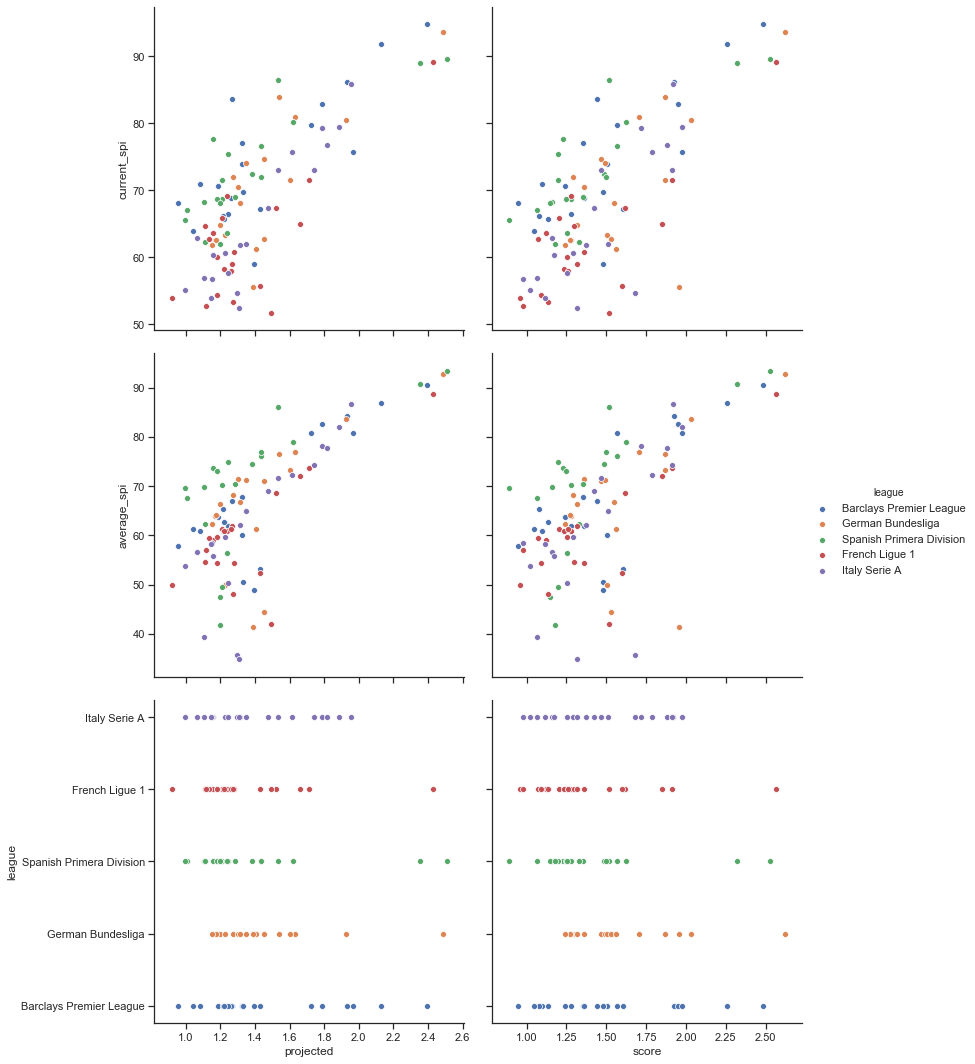

In [119]:
plot4 = sns.pairplot(top_league_teams, hue='league', y_vars=['current_spi', 'average_spi', 'league'], x_vars=['projected', 'score'], height=5)